In [7]:
import pickle
import numpy as np


PICKLE_FILE = './v0.1/persona_embeddings_Qwen.Qwen3-Embedding-0.6B_0-499.pkl'
with open(PICKLE_FILE, 'rb') as f:
    test_sentence1 = pickle.load(f)
print("Successfully loaded 'test_sentence' from file.")


PICKLE_FILE = './v0.1/persona_embeddings_Qwen.Qwen3-Embedding-0.6B_500-999.pkl'
with open(PICKLE_FILE, 'rb') as f:
    test_sentence2 = pickle.load(f)
print("Successfully loaded 'test_sentence' from file.")


PICKLE_FILE = './v0.1/persona_embeddings_Qwen.Qwen3-Embedding-0.6B_1000-1499.pkl'
with open(PICKLE_FILE, 'rb') as f:
    test_sentence3 = pickle.load(f)
print("Successfully loaded 'test_sentence' from file.")


PICKLE_FILE = './v0.1/persona_embeddings_Qwen.Qwen3-Embedding-0.6B_1500-1999.pkl'
with open(PICKLE_FILE, 'rb') as f:
    test_sentence4 = pickle.load(f)
print("Successfully loaded 'test_sentence' from file.")


PICKLE_FILE = './v0.1/persona_embeddings_Qwen.Qwen3-Embedding-0.6B_2000-2499.pkl'
with open(PICKLE_FILE, 'rb') as f:
    test_sentence5 = pickle.load(f)
print("Successfully loaded 'test_sentence' from file.")

PICKLE_FILE = './v0.1/persona_embeddings_Qwen.Qwen3-Embedding-0.6B_2500-2999.pkl'
with open(PICKLE_FILE, 'rb') as f:
    test_sentence6 = pickle.load(f)
print("Successfully loaded 'test_sentence' from file.")



hobbies_embeddings_dir="../initial_expedition/canonical_embeddings_qwen.npy"

hobbies_embeddings = np.load(hobbies_embeddings_dir, allow_pickle=True)
print("Successfully loaded 'hobbies_embeddings' from file.")


Successfully loaded 'test_sentence' from file.
Successfully loaded 'test_sentence' from file.
Successfully loaded 'test_sentence' from file.
Successfully loaded 'test_sentence' from file.
Successfully loaded 'test_sentence' from file.
Successfully loaded 'test_sentence' from file.
Successfully loaded 'hobbies_embeddings' from file.


In [4]:
test_sentence1.shape, test_sentence2.shape, hobbies_embeddings.shape

((500, 1024), (500, 1024), (4515, 1024))

In [3]:
test_sentence1[0], test_sentence2[0]

(array([-0.06002643,  0.00457136, -0.01015556, ..., -0.01068169,
        -0.02230228, -0.01966199], dtype=float32),
 array([ 0.02908616,  0.0284978 , -0.0118348 , ..., -0.01172211,
         0.00545961, -0.02273143], dtype=float32))

Original embeddings shape: (3000, 1024)
t-SNE reducer initialized. Fitting and transforming data...
New 2D embeddings shape: (3000, 2)
Plotting the 2D embeddings...


C:\Users\alt_user\AppData\Local\Temp\ipykernel_14316\1133374647.py:60: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


Successfully saved plot to 'embedding_visualization_wh_50.0_3000.png'


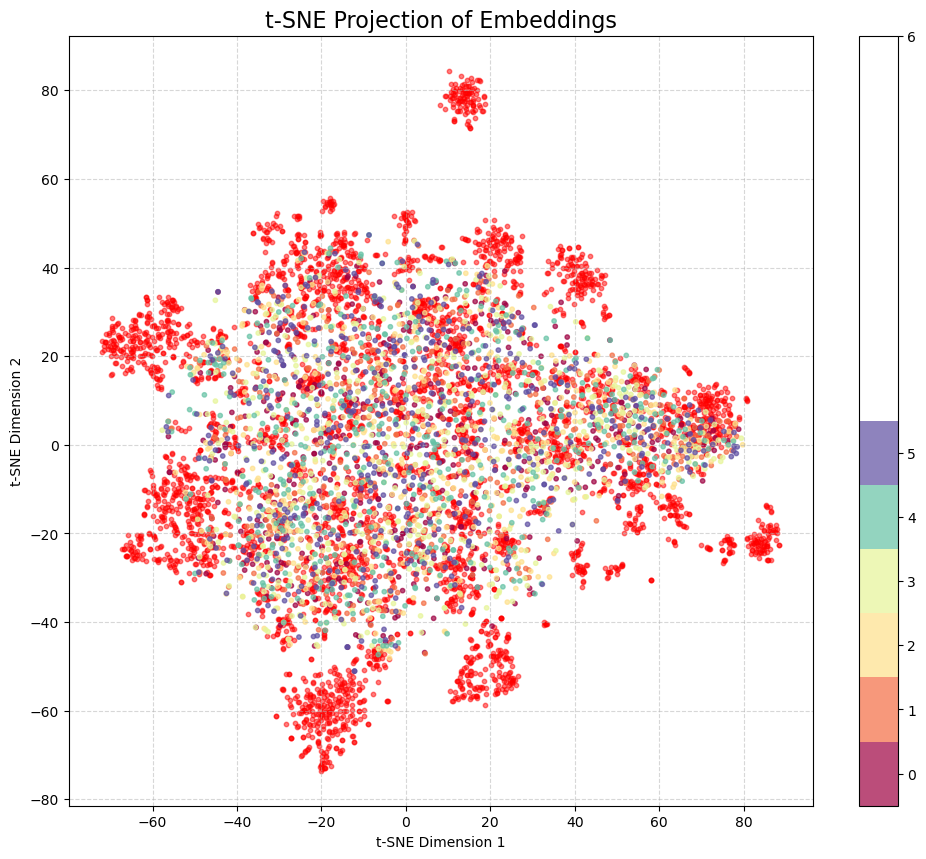

In [8]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# # Combine them into one big array
# embeddings = np.vstack([cluster_1, cluster_2, cluster_3])

# # We also create a "labels" array just for coloring the plot
# # 0 = Engineers, 1 = Chefs, 2 = Artists
# labels = np.array([0] * 100 + [1] * 100 + [2] * 100)

embeddings=np.vstack([test_sentence1, test_sentence2, test_sentence3, test_sentence4, test_sentence5, test_sentence6])
labels = np.array([0] * len(test_sentence1) + [1] * len(test_sentence2)+ 
                  [2] * len(test_sentence3) + [3] * len(test_sentence4) +
                  [4] * len(test_sentence5) + [5] * len(test_sentence6))

print(f"Original embeddings shape: {embeddings.shape}")

# -----------------------------------------------------------------
# VVVVVV REPLACE THE DUMMY DATA ABOVE WITH YOUR REAL DATA VVVVVV
# -----------------------------------------------------------------
# For example:
# embeddings = np.load('my_qwen_embeddings.npy')
# Or if it's a list of lists:
# embeddings = np.array(my_embedding_list)
# -----------------------------------------------------------------


# --- 2. Initialize t-SNE Reducer ---
# This is where you set the parameters for the reduction.
perplexity_value = 50.0  # You can experiment with this value.
n_iter=3000        # More iterations can lead to better results.
tsne = TSNE(
    n_components=2,    # We want a 2D plot (x, y).
    random_state=42,   # For reproducible results.
    perplexity=perplexity_value,   # This is the main parameter to tune. It's roughly the number of "neighbors" to consider.
    max_iter=n_iter,       # Number of iterations for the optimization.
    init='pca',        # 'pca' initialization is stable and fast.
    learning_rate='auto' # Automatically tunes the learning rate.
)
print("t-SNE reducer initialized. Fitting and transforming data...")

# --- 3. Fit and Transform Data ---
# This runs the algorithm and "crushes" the 512-dim vectors down to 2-dim vectors.
# Note: t-SNE can be slow on very large datasets (>10,000 points).
# If your dataset is huge, consider taking a random sample of 5-10k points.
embedding_2d = tsne.fit_transform(embeddings)
answers = tsne.fit_transform(hobbies_embeddings)

print(f"New 2D embeddings shape: {embedding_2d.shape}")


# --- 4. Plot the Results ---
print("Plotting the 2D embeddings...")
plt.figure(figsize=(12, 10))

# We can use our 'labels' to color-code the plot.
# If you don't have labels, you can just do:
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=5, alpha=0.7)
plt.scatter(
    answers[:, 0],  # X-axis
    answers[:, 1],  # Y-axis
    c="red",            # Color by our dummy labels
    cmap='Spectral',     # A good colormap for clusters
    s=10,                # Size of the dots
    alpha=0.5            # Make points slightly transparent
)
plt.scatter(
    embedding_2d[:, 0],  # X-axis
    embedding_2d[:, 1],  # Y-axis
    c=labels,            # Color by our dummy labels
    cmap='Spectral',     # A good colormap for clusters
    s=10,                # Size of the dots
    alpha=0.7            # Make points slightly transparent
)


plt.title('t-SNE Projection of Embeddings', fontsize=16)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(7))
plt.grid(True, linestyle='--', alpha=0.5)

# Save the plot to a file
plt.savefig(f'embedding_visualization_wh_{perplexity_value}_{n_iter}.png', dpi=300, bbox_inches='tight')

print(f"Successfully saved plot to 'embedding_visualization_wh_{perplexity_value}_{n_iter}.png'")

t-SNE reducer initializing for 3D...
Fitting and transforming data to 3D...


c:\Users\alt_user\anaconda3\envs\prop_env\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


New 3D embeddings shape: (3000, 3)
Plotting the 3D embeddings...
Successfully saved 3D plot to 'embedding_visualization_3d_50.0_3000.png'


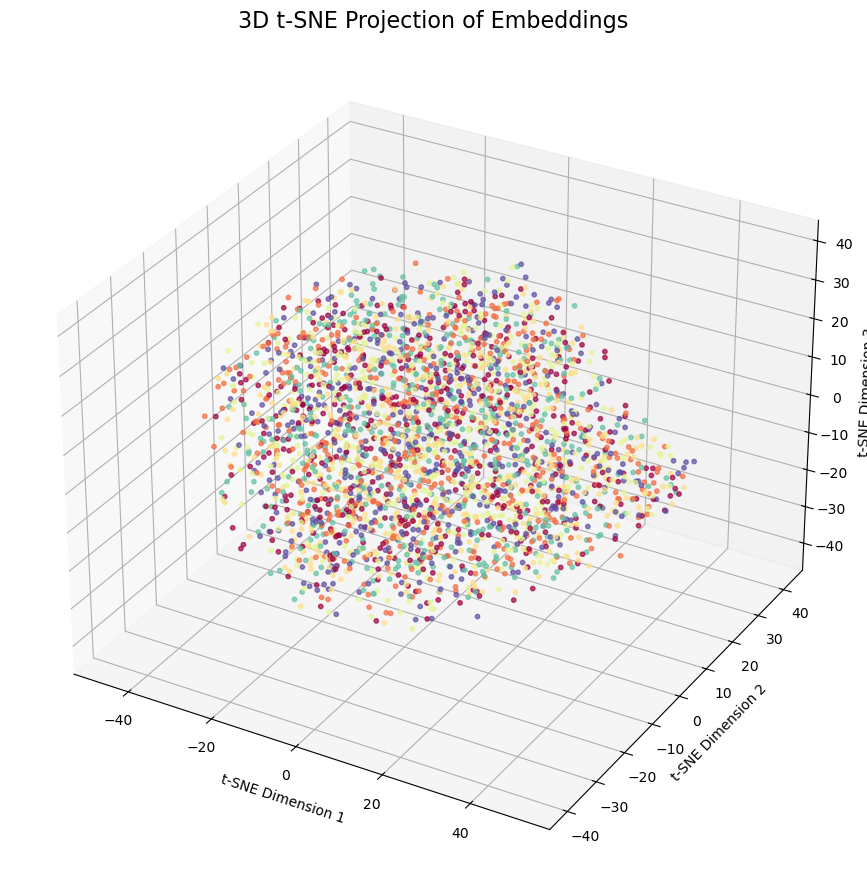

In [5]:

# -----------------------------------------------------------------
# VVVVVV REPLACE THE DUMMY DATA ABOVE WITH YOUR REAL DATA VVVVVV
# -----------------------------------------------------------------
# For example:
# embeddings = np.load('my_qwen_embeddings.npy')
# Or if it's a list of lists:
# embeddings = np.array(my_embedding_list)
# -----------------------------------------------------------------


# --- 2. Initialize t-SNE Reducer for 3D ---
# THIS IS THE KEY CHANGE: n_components=3
print("t-SNE reducer initializing for 3D...")
tsne_3d = TSNE(
    n_components=3,    # We want a 3D plot (x, y, z).
    random_state=42,   # For reproducible results.
    perplexity=perplexity_value,   # Using the perplexity you specified.
    n_iter=n_iter,
    init='pca',
    learning_rate='auto'
)

# --- 3. Fit and Transform Data ---
print("Fitting and transforming data to 3D...")
embedding_3d = tsne_3d.fit_transform(embeddings)
print(f"New 3D embeddings shape: {embedding_3d.shape}")

# --- 4. Plot the Results in 3D ---
print("Plotting the 3D embeddings...")
fig = plt.figure(figsize=(13, 11))
ax = fig.add_subplot(projection='3d')

# We can use our 'labels' to color-code the plot.
# If you don't have labels, you can just do:
# ax.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], s=10, alpha=0.7)
ax.scatter(
    embedding_3d[:, 0],  # X-axis
    embedding_3d[:, 1],  # Y-axis
    embedding_3d[:, 2],  # Z-axis
    c=labels,            # Color by our dummy labels
    cmap='Spectral',     # A good colormap for clusters
    s=10,                # Size of the dots
    alpha=0.7
)

ax.set_title('3D t-SNE Projection of Embeddings', fontsize=16)
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')

plt.grid(True, linestyle='--', alpha=0.5)

# Save the plot to a file
plt.savefig(f'embedding_visualization_3d_{perplexity_value}_{n_iter}.png', dpi=300, bbox_inches='tight')

print(f"Successfully saved 3D plot to 'embedding_visualization_3d_{perplexity_value}_{n_iter}.png'")

In [9]:
import pickle
import numpy as np


PICKLE_FILE = './v0.1_8B/persona_embeddings_Qwen.Qwen3-Embedding-8B_0-499.pkl'
with open(PICKLE_FILE, 'rb') as f:
    test_sentence1 = pickle.load(f)
print("Successfully loaded 'test_sentence' from file.")


PICKLE_FILE = './v0.1_8B/persona_embeddings_Qwen.Qwen3-Embedding-8B_500-999.pkl'
with open(PICKLE_FILE, 'rb') as f:
    test_sentence2 = pickle.load(f)
print("Successfully loaded 'test_sentence' from file.")


PICKLE_FILE = './v0.1_8B/persona_embeddings_Qwen.Qwen3-Embedding-8B_1000-1499.pkl'
with open(PICKLE_FILE, 'rb') as f:
    test_sentence3 = pickle.load(f)
print("Successfully loaded 'test_sentence' from file.")


PICKLE_FILE = './v0.1_8B/persona_embeddings_Qwen.Qwen3-Embedding-8B_1500-1999.pkl'
with open(PICKLE_FILE, 'rb') as f:
    test_sentence4 = pickle.load(f)
print("Successfully loaded 'test_sentence' from file.")


PICKLE_FILE = './v0.1_8B/persona_embeddings_Qwen.Qwen3-Embedding-8B_2000-2499.pkl'
with open(PICKLE_FILE, 'rb') as f:
    test_sentence5 = pickle.load(f)
print("Successfully loaded 'test_sentence' from file.")

PICKLE_FILE = './v0.1_8B/persona_embeddings_Qwen.Qwen3-Embedding-8B_2500-2999.pkl'
with open(PICKLE_FILE, 'rb') as f:
    test_sentence6 = pickle.load(f)
print("Successfully loaded 'test_sentence' from file.")



hobbies_embeddings_dir="../initial_expedition/canonical_embeddings_qwen8B.npy"

hobbies_embeddings = np.load(hobbies_embeddings_dir, allow_pickle=True)
print("Successfully loaded 'hobbies_embeddings' from file.")


Successfully loaded 'test_sentence' from file.
Successfully loaded 'test_sentence' from file.
Successfully loaded 'test_sentence' from file.
Successfully loaded 'test_sentence' from file.
Successfully loaded 'test_sentence' from file.
Successfully loaded 'test_sentence' from file.
Successfully loaded 'hobbies_embeddings' from file.


Original embeddings shape: (3000, 4096)
t-SNE reducer initialized. Fitting and transforming data...
New 2D embeddings shape: (3000, 2)
Plotting the 2D embeddings...


C:\Users\alt_user\AppData\Local\Temp\ipykernel_14316\1133374647.py:60: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


Successfully saved plot to 'embedding_visualization_wh_50.0_3000.png'


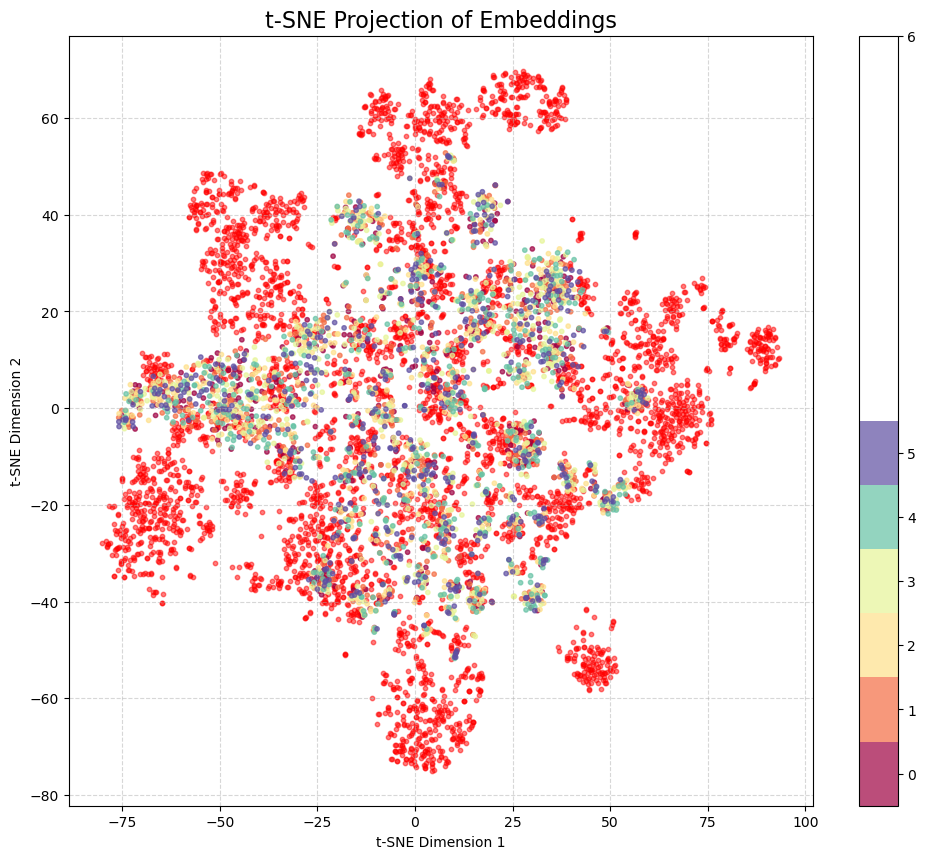

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# # Combine them into one big array
# embeddings = np.vstack([cluster_1, cluster_2, cluster_3])

# # We also create a "labels" array just for coloring the plot
# # 0 = Engineers, 1 = Chefs, 2 = Artists
# labels = np.array([0] * 100 + [1] * 100 + [2] * 100)

embeddings=np.vstack([test_sentence1, test_sentence2, test_sentence3, test_sentence4, test_sentence5, test_sentence6])
labels = np.array([0] * len(test_sentence1) + [1] * len(test_sentence2)+ 
                  [2] * len(test_sentence3) + [3] * len(test_sentence4) +
                  [4] * len(test_sentence5) + [5] * len(test_sentence6))

print(f"Original embeddings shape: {embeddings.shape}")

# -----------------------------------------------------------------
# VVVVVV REPLACE THE DUMMY DATA ABOVE WITH YOUR REAL DATA VVVVVV
# -----------------------------------------------------------------
# For example:
# embeddings = np.load('my_qwen_embeddings.npy')
# Or if it's a list of lists:
# embeddings = np.array(my_embedding_list)
# -----------------------------------------------------------------


# --- 2. Initialize t-SNE Reducer ---
# This is where you set the parameters for the reduction.
perplexity_value = 50.0  # You can experiment with this value.
n_iter=3000        # More iterations can lead to better results.
tsne = TSNE(
    n_components=2,    # We want a 2D plot (x, y).
    random_state=42,   # For reproducible results.
    perplexity=perplexity_value,   # This is the main parameter to tune. It's roughly the number of "neighbors" to consider.
    max_iter=n_iter,       # Number of iterations for the optimization.
    init='pca',        # 'pca' initialization is stable and fast.
    learning_rate='auto' # Automatically tunes the learning rate.
)
print("t-SNE reducer initialized. Fitting and transforming data...")

# --- 3. Fit and Transform Data ---
# This runs the algorithm and "crushes" the 512-dim vectors down to 2-dim vectors.
# Note: t-SNE can be slow on very large datasets (>10,000 points).
# If your dataset is huge, consider taking a random sample of 5-10k points.
embedding_2d = tsne.fit_transform(embeddings)
answers = tsne.fit_transform(hobbies_embeddings)

print(f"New 2D embeddings shape: {embedding_2d.shape}")


# --- 4. Plot the Results ---
print("Plotting the 2D embeddings...")
plt.figure(figsize=(12, 10))

# We can use our 'labels' to color-code the plot.
# If you don't have labels, you can just do:
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=5, alpha=0.7)
plt.scatter(
    answers[:, 0],  # X-axis
    answers[:, 1],  # Y-axis
    c="red",            # Color by our dummy labels
    cmap='Spectral',     # A good colormap for clusters
    s=10,                # Size of the dots
    alpha=0.5            # Make points slightly transparent
)
plt.scatter(
    embedding_2d[:, 0],  # X-axis
    embedding_2d[:, 1],  # Y-axis
    c=labels,            # Color by our dummy labels
    cmap='Spectral',     # A good colormap for clusters
    s=10,                # Size of the dots
    alpha=0.7            # Make points slightly transparent
)


plt.title('t-SNE Projection of Embeddings', fontsize=16)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(7))
plt.grid(True, linestyle='--', alpha=0.5)

# Save the plot to a file
plt.savefig(f'embedding_visualization_wh8B_{perplexity_value}_{n_iter}.png', dpi=300, bbox_inches='tight')

print(f"Successfully saved plot to 'embedding_visualization_wh8B_{perplexity_value}_{n_iter}.png'")

Plotting the 2D embeddings...
Successfully saved plot to 'embedding_visualization_8B_50.0_3000.png'


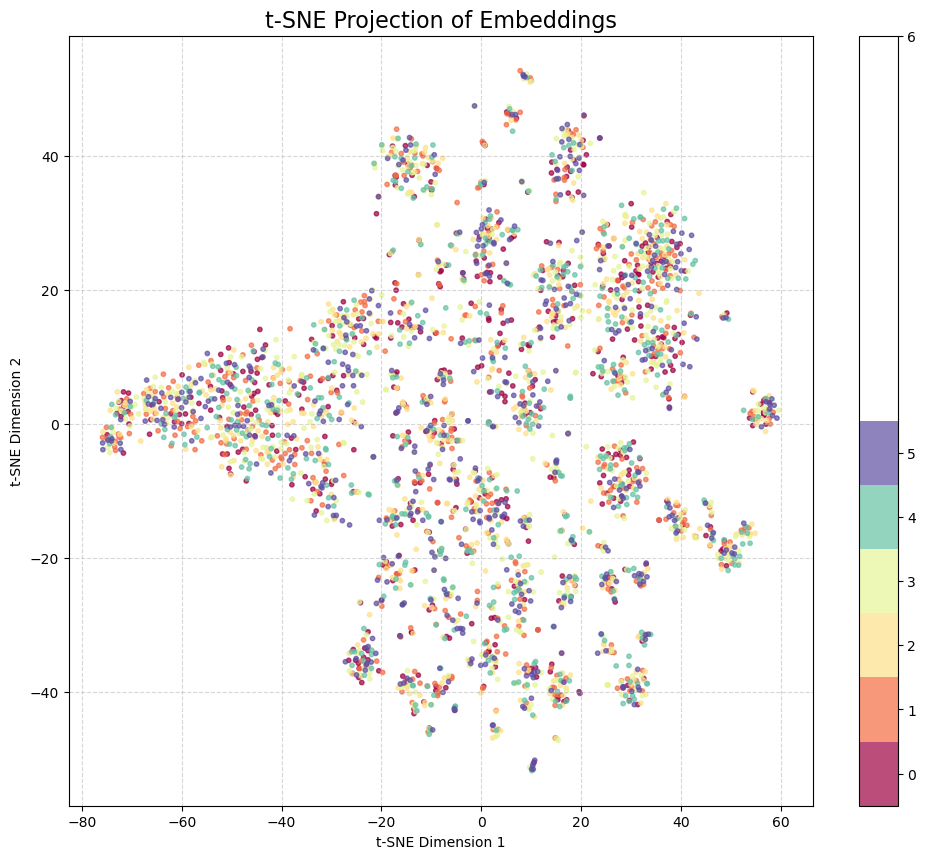

In [6]:
print("Plotting the 2D embeddings...")
plt.figure(figsize=(12, 10))

# We can use our 'labels' to color-code the plot.
# If you don't have labels, you can just do:
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=5, alpha=0.7)
# plt.scatter(
#     answers[:, 0],  # X-axis
#     answers[:, 1],  # Y-axis
#     c="red",            # Color by our dummy labels
#     cmap='Spectral',     # A good colormap for clusters
#     s=10,                # Size of the dots
#     alpha=0.5            # Make points slightly transparent
# )
plt.scatter(
    embedding_2d[:, 0],  # X-axis
    embedding_2d[:, 1],  # Y-axis
    c=labels,            # Color by our dummy labels
    cmap='Spectral',     # A good colormap for clusters
    s=10,                # Size of the dots
    alpha=0.7            # Make points slightly transparent
)


plt.title('t-SNE Projection of Embeddings', fontsize=16)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(7))
plt.grid(True, linestyle='--', alpha=0.5)

# Save the plot to a file
plt.savefig(f'embedding_visualization_8B_{perplexity_value}_{n_iter}.png', dpi=300, bbox_inches='tight')

print(f"Successfully saved plot to 'embedding_visualization_8B_{perplexity_value}_{n_iter}.png'")